In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd
import scipy.signal as signal
import librosa

sys.path.append("/Users/oscarjimenezbou/Library/Mobile Documents/com~apple~CloudDocs/Documents/University_projects/TDS"
                )

In [4]:
from scipy.io import wavfile
from utils import number_count_detector, convert_m4p_to_wav, export_numbers

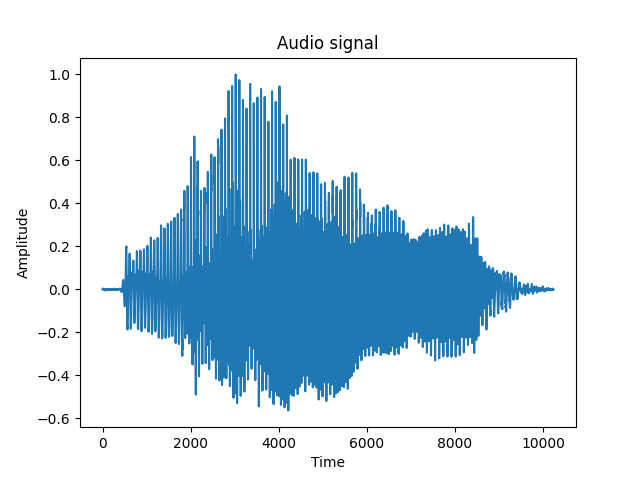

In [16]:
%matplotlib widget
frequency_audio, audio = wavfile.read("nine.wav")

# convert mono, normalize
if len(audio.shape) > 1:
    audio = audio[:, 0]

audio = audio / np.max(np.abs(audio))

yt, index = librosa.effects.trim(
    audio, top_db=20, frame_length=2048, hop_length=512)

# plot the audio signal
plt.figure()
plt.plot(yt)
plt.title("Audio signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()